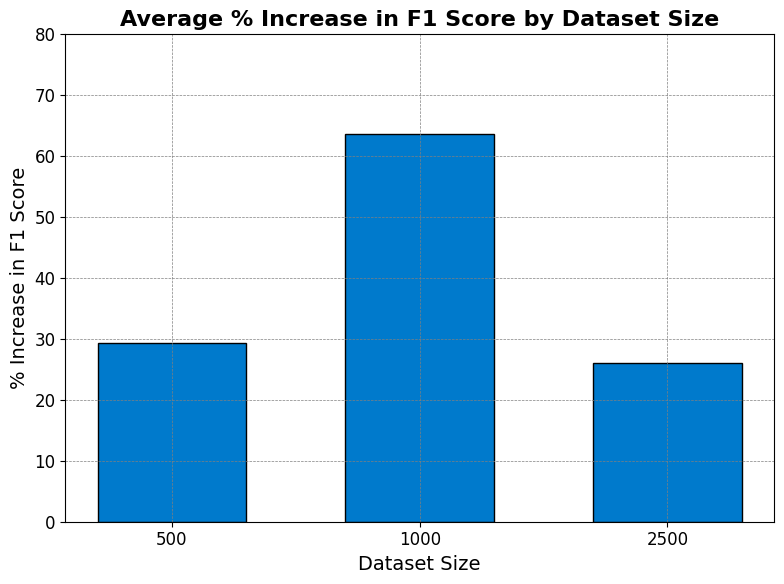

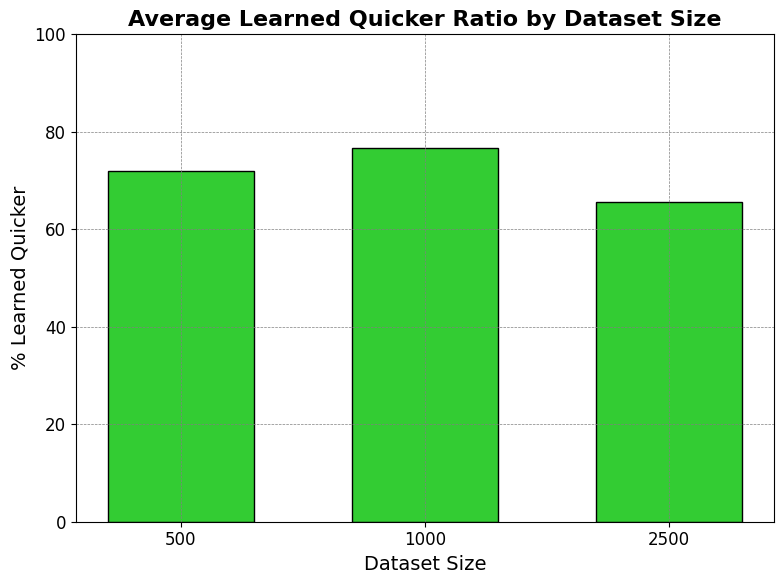

In [17]:
import matplotlib.pyplot as plt
import numpy as np

path = '../results/general_figures'

# Data from previous analysis
dataset_sizes = ['500', '1000', '2500']
f1_scores = [29.33, 63.64, 26.05]  # Average % Increase F1 Scores
learned_quick_ratios = [72.04, 76.67, 65.56]  # Average Learned Quicker Ratios in %

# Define professional color palette and styles
colors = ['#007acc', '#33cc33']  # Blue for F1 Score, Green for Learned Quicker
bar_width = 0.6
edge_color = 'black'

# Font settings for a more professional look
font_options = {'family' : 'sans-serif',
                'weight' : 'normal',
                'size'   : 12}
plt.rc('font', **font_options)

index = np.arange(len(dataset_sizes))

# Plot for Average % Increase in F1 Score
def plot_f1_scores():
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(index, f1_scores, bar_width, color=colors[0], edgecolor=edge_color)
    ax.set_title('Average % Increase in F1 Score by Dataset Size', fontsize=16, fontweight='bold')
    ax.set_xlabel('Dataset Size', fontsize=14)
    ax.set_ylabel('% Increase in F1 Score', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(dataset_sizes)
    ax.set_ylim(0, 80)  # Set the limit to fit the max value
    ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
    plt.tight_layout()
    plt.savefig(f'{path}/avg_inc_f1_50%_sizes.png')  # Save the figure
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid display issues

# Plot for Average Learned Quicker Ratio
def plot_learned_quicker():
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(index, learned_quick_ratios, bar_width, color=colors[1], edgecolor=edge_color)
    ax.set_title('Average Learned Quicker Ratio by Dataset Size', fontsize=16, fontweight='bold')
    ax.set_xlabel('Dataset Size', fontsize=14)
    ax.set_ylabel('% Learned Quicker', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(dataset_sizes)
    ax.set_ylim(0, 100)  # Percentage scale
    ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
    plt.tight_layout()
    plt.savefig(f'{path}/avg_learn_50%_sizes.png')  # Save the figure
    plt.show()  # Displa_ the plot
    plt.close()  # Close the plot to avoid display issues

# Call the functions to generate and save the plots
plot_f1_scores()
plot_learned_quicker()


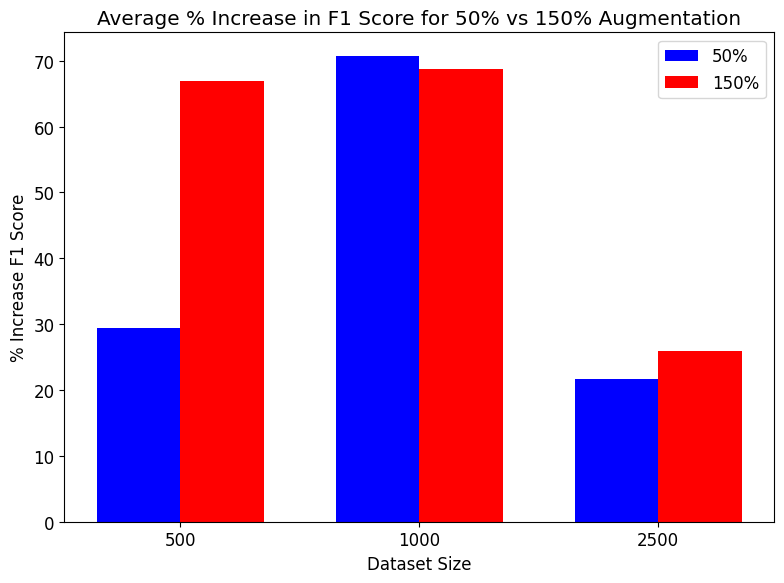

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each method, dataset size and augmentation percentage
data_50 = {
    '500': {'Rotate(5)': 54.11, 'Rotate(20)': 14.14, 'HistEq': 29.26, 'Contrast(0.5)': 20.12},
    '1000': {'Rotate(5)': 113.69, 'Rotate(20)': 62.22, 'HistEq': 57.51, 'Contrast(0.5)': 49.72},
    '2500': {'Rotate(5)': 50.07, 'Rotate(20)': 20.02, 'HistEq': 2.45, 'Contrast(0.5)': 14.26}
}

data_150 = {
    '500': {'Rotate(5)': 117.14, 'Rotate(20)': 40.23, 'HistEq': 73.48, 'Contrast(0.5)': 36.71},
    '1000': {'Rotate(5)': 98.94, 'Rotate(20)': 55.03, 'HistEq': 52.50, 'Contrast(0.5)': 68.38},
    '2500': {'Rotate(5)': 34.19, 'Rotate(20)': 28.54, 'HistEq': 21.29, 'Contrast(0.5)': 19.46}
}

# Function to calculate average F1 scores
def calculate_average(data_dict):
    return {size: np.mean(list(values.values())) for size, values in data_dict.items()}

avg_50 = calculate_average(data_50)
avg_150 = calculate_average(data_150)

# Dataset sizes and their corresponding averages
dataset_sizes = ['500', '1000', '2500']
averages_50 = [avg_50[size] for size in dataset_sizes]
averages_150 = [avg_150[size] for size in dataset_sizes]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(dataset_sizes))
bar_width = 0.35

bars_50 = ax.bar(index - bar_width/2, averages_50, bar_width, label='50%', color='blue')
bars_150 = ax.bar(index + bar_width/2, averages_150, bar_width, label='150%', color='red')

ax.set_xlabel('Dataset Size')
ax.set_ylabel('% Increase F1 Score')
ax.set_title('Average % Increase in F1 Score for 50% vs 150% Augmentation')
ax.set_xticks(index)
ax.set_xticklabels(dataset_sizes)
ax.legend()

plt.tight_layout()
plt.savefig(f'{path}/avg_inc_f1_50_150.png')
plt.show()


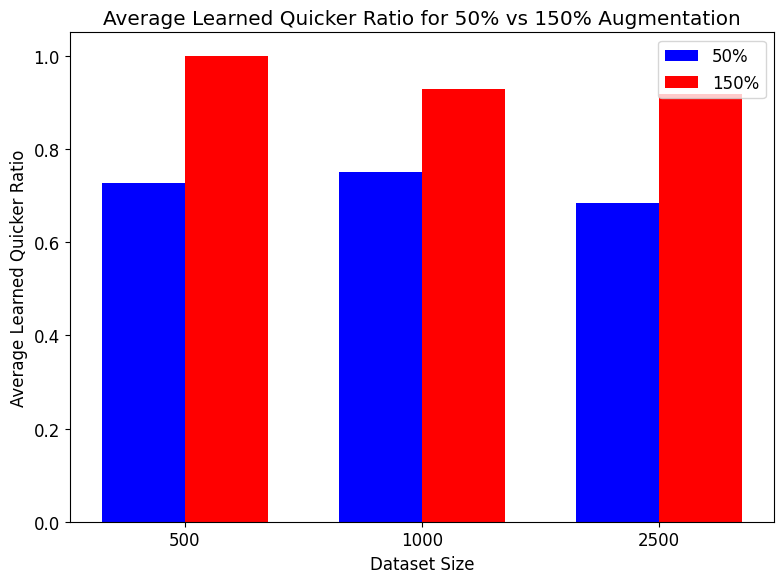

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each method, dataset size, and augmentation percentage (Learned Quicker)
data_50_lq = {
    '500': {'Rotate(5)': 13/15, 'Rotate(20)': 12/15, 'HistEq': 9/15, 'Contrast(0.5)': 9/14},
    '1000': {'Rotate(5)': 14/15, 'Rotate(20)': 13/15, 'HistEq': 9/15, 'Contrast(0.5)': 9/15},
    '2500': {'Rotate(5)': 14/15, 'Rotate(20)': 10/15, 'HistEq': 9/15, 'Contrast(0.5)': 8/15}
}

data_150_lq = {
    '500': {'Rotate(5)': 15/15, 'Rotate(20)': 15/15, 'HistEq': 15/15, 'Contrast(0.5)': 14/14},
    '1000': {'Rotate(5)': 15/15, 'Rotate(20)': 15/15, 'HistEq': 15/15, 'Contrast(0.5)': 10/14},
    '2500': {'Rotate(5)': 15/15, 'Rotate(20)': 15/15, 'HistEq': 15/15, 'Contrast(0.5)': 10/15}
}

# Function to calculate average Learned Quicker ratios
def calculate_average_lq(data_dict):
    return {size: np.mean(list(values.values())) for size, values in data_dict.items()}

avg_50_lq = calculate_average_lq(data_50_lq)
avg_150_lq = calculate_average_lq(data_150_lq)

# Dataset sizes and their corresponding averages
dataset_sizes = ['500', '1000', '2500']
averages_50_lq = [avg_50_lq[size] for size in dataset_sizes]
averages_150_lq = [avg_150_lq[size] for size in dataset_sizes]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(dataset_sizes))
bar_width = 0.35

bars_50_lq = ax.bar(index - bar_width/2, averages_50_lq, bar_width, label='50%', color='blue')
bars_150_lq = ax.bar(index + bar_width/2, averages_150_lq, bar_width, label='150%', color='red')

ax.set_xlabel('Dataset Size')
ax.set_ylabel('Average Learned Quicker Ratio')
ax.set_title('Average Learned Quicker Ratio for 50% vs 150% Augmentation')
ax.set_xticks(index)
ax.set_xticklabels(dataset_sizes)
ax.legend()

plt.tight_layout()
plt.savefig(f'{path}/avg_learn_50_150.png')
plt.show()


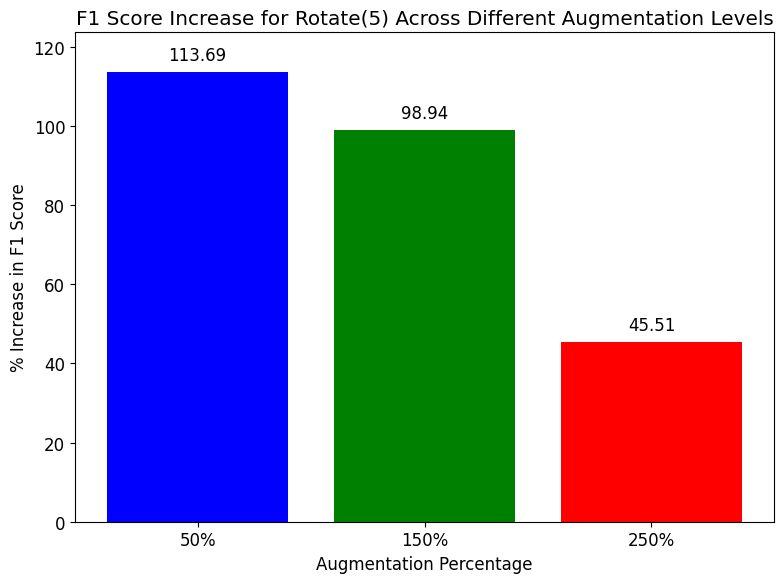

In [29]:
import matplotlib.pyplot as plt

# Data for the bar chart
methods = ['50%', '150%', '250%']
f1_scores = [113.69, 98.94, 45.51]  # Extracted values from the tables

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(methods, f1_scores, color=['blue', 'green', 'red'])

# Adding labels and title
ax.set_xlabel('Augmentation Percentage')
ax.set_ylabel('% Increase in F1 Score')
ax.set_title('F1 Score Increase for Rotate(5) Across Different Augmentation Levels')
ax.set_ylim(0, max(f1_scores) + 10)  # Set y-limit slightly higher than the max F1 score for better visualization

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{path}/rotate5_f1_increase_1000.png')
plt.show()


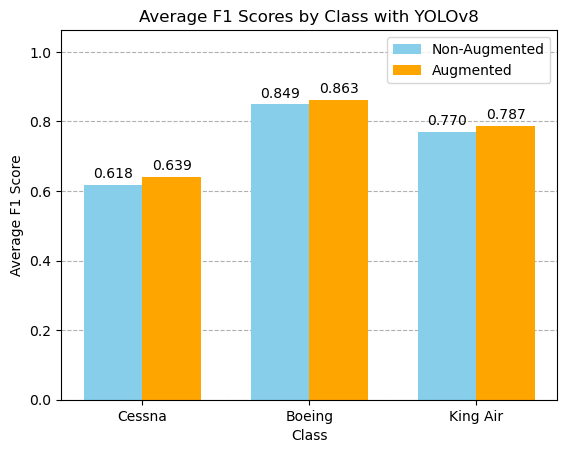

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the f1 scores for each class from the non-augmented test results
f1_scores_non_augmented = [
    {'Cessna': 0.555, 'Boeing': 0.811, 'King Air': 0.718},
    {'Cessna': 0.634, 'Boeing': 0.877, 'King Air': 0.764},
    {'Cessna': 0.685, 'Boeing': 0.870, 'King Air': 0.817},
    {'Cessna': 0.539, 'Boeing': 0.821, 'King Air': 0.741},
    {'Cessna': 0.648, 'Boeing': 0.872, 'King Air': 0.773},
    {'Cessna': 0.676, 'Boeing': 0.858, 'King Air': 0.803},
    {'Cessna': 0.552, 'Boeing': 0.813, 'King Air': 0.729},
    {'Cessna': 0.658, 'Boeing': 0.869, 'King Air': 0.811}
]

# Define the f1 scores for each class from the augmented test results
f1_scores_augmented = [
    {'Cessna': 0.579, 'Boeing': 0.840, 'King Air': 0.753},
    {'Cessna': 0.657, 'Boeing': 0.889, 'King Air': 0.786},
    {'Cessna': 0.698, 'Boeing': 0.884, 'King Air': 0.830},
    {'Cessna': 0.565, 'Boeing': 0.826, 'King Air': 0.737},
    {'Cessna': 0.665, 'Boeing': 0.879, 'King Air': 0.805},
    {'Cessna': 0.680, 'Boeing': 0.874, 'King Air': 0.811},
    {'Cessna': 0.580, 'Boeing': 0.827, 'King Air': 0.765},
    {'Cessna': 0.689, 'Boeing': 0.882, 'King Air': 0.812}
]

# Convert lists of dictionaries into DataFrames
df_non_augmented = pd.DataFrame(f1_scores_non_augmented)
df_augmented = pd.DataFrame(f1_scores_augmented)

# Calculate average F1 scores for both datasets
average_f1_non_augmented = df_non_augmented.mean()
average_f1_augmented = df_augmented.mean()

# Data for plotting
classes = ['Cessna', 'Boeing', 'King Air']
non_augmented_scores = [average_f1_non_augmented[class_name] for class_name in classes]
augmented_scores = [average_f1_augmented[class_name] for class_name in classes]

# Creating the bar chart
fig, ax = plt.subplots()
index = range(len(classes))
bar_width = 0.35

rects1 = ax.bar(index, non_augmented_scores, bar_width, label='Non-Augmented', color='skyblue')
rects2 = ax.bar([p + bar_width for p in index], augmented_scores, bar_width, label='Augmented', color='orange')

# Adding text labels above bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Class')
ax.set_ylabel('Average F1 Score')
ax.set_title('Average F1 Scores by Class with YOLOv8')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(classes)
ax.legend()

# Adding a grid
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--')

# Adjust y-axis limit to include padding above the tallest bar
max_height = max(non_augmented_scores + augmented_scores)
ax.set_ylim(0, max_height + 0.2)  # Adds 5% padding above the tallest

plt.savefig(f'../results/general_figures/avg_f1_scores_per_class_2500.png')
plt.show()


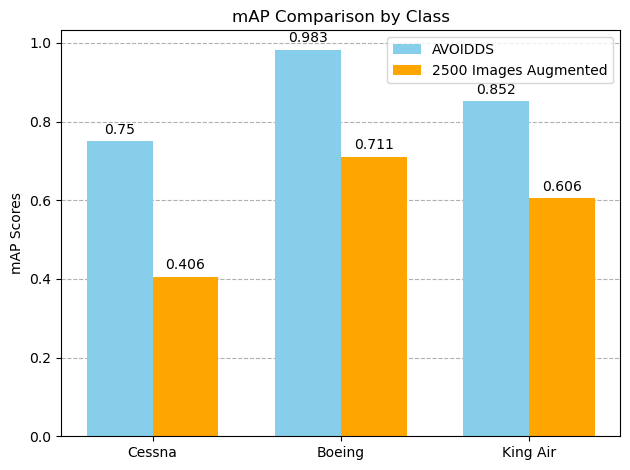

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ['Cessna', 'Boeing', 'King Air']
avoidds_map = [0.750, 0.983, 0.852]
augmented_map = [0.406, 0.711, 0.606]

x = np.arange(len(classes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avoidds_map, width, label='AVOIDDS', color='skyblue')
rects2 = ax.bar(x + width/2, augmented_map, width, label='2500 Images Augmented', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mAP Scores')
ax.set_title('mAP Comparison by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--')

# Adjust y-axis limit to include padding above the tallest bar

fig.tight_layout()
plt.savefig('../results/general_figures/mAP_comparison_by_class.png')
plt.show()
